# **Sleep Prediction Disorder**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
df.shape

(374, 13)

In [ ]:
df.size

4862

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## **Data preprocessing**

In [ ]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df['Sleep Disorder'].fillna('None', inplace=True)

<ipython-input-11-baf0d52f98af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna('None', inplace=True)


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
df.drop('Person ID', axis=1, inplace=True)

In [ ]:
print("Unique values in each column are:")
for col in df.columns:
    print(col,df[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Software Engineer,4
Scientist,4


In [ ]:
# Merging 'Sales Representative' with 'Salesperson'
df["Occupation"] = df["Occupation"].replace({'Sales Representative': 'Salesperson'})
# Merging 'Software Engineer' with 'Engineer'
df["Occupation"] = df["Occupation"].replace({'Software Engineer': 'Engineer'})
# Removing 'Scientist' and 'Manager'
drop = df[df['Occupation'].isin(['Manager', 'Scientist'])].index
df = df.drop(drop)


In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,67
Lawyer,47
Teacher,40
Accountant,37
Salesperson,34


In [ ]:
df.shape


(369, 12)

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,143
Normal Weight,21
Obese,10


In [ ]:
df['BMI Category'] =df['BMI Category'].replace({'Normal Weight': 'Normal'})
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,216
Overweight,143
Obese,10


In [ ]:
# Split by '/'
df[['Systolic Pressure', 'Diastolic Pressure']] = df['Blood Pressure'].str.split('/', expand=True)
# Convert from string to numeric using .to_numeric
df['Systolic Pressure'] = pd.to_numeric(df['Systolic Pressure'])
df['Diastolic Pressure'] = pd.to_numeric(df['Diastolic Pressure'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure
0,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


In [ ]:
blood_pressure_conditions = [
    (df['Systolic Pressure'] < 120) & (df['Diastolic Pressure'] < 80), # Normal
    (df['Systolic Pressure'].between(120, 140)) & (df['Diastolic Pressure'] < 90), # High-Normal
    (df['Systolic Pressure'] >= 140) & (df['Diastolic Pressure'] >= 90) | (df['Diastolic Pressure'] >= 80) # Hypertension
]

labels = ['Normal', 'High-Normal', 'Hypertension']

df['Blood Pressure Category'] = np.select(blood_pressure_conditions, labels, default='Undefined')
df['Blood Pressure Category'].value_counts()


,count
Blood Pressure Category,
High-Normal,228
Hypertension,100
Normal,41


In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,High-Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,High-Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,High-Normal
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Hypertension


In [ ]:
df.shape

(369, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   369 non-null    object 
 1   Age                      369 non-null    int64  
 2   Occupation               369 non-null    object 
 3   Sleep Duration           369 non-null    float64
 4   Quality of Sleep         369 non-null    int64  
 5   Physical Activity Level  369 non-null    int64  
 6   Stress Level             369 non-null    int64  
 7   BMI Category             369 non-null    object 
 8   Blood Pressure           369 non-null    object 
 9   Heart Rate               369 non-null    int64  
 10  Daily Steps              369 non-null    int64  
 11  Sleep Disorder           369 non-null    object 
 12  Systolic Pressure        369 non-null    int64  
 13  Diastolic Pressure       369 non-null    int64  
 14  Blood Pressure Category  369 no

In [ ]:
df['Sleep Disorder'] = np.where(df['Sleep Disorder'] == 'NO', 0,
np.where(df['Sleep Disorder'] == 'Sleep Apnea', 1,
np.where(df['Sleep Disorder'] == 'Insomnia', 2,-1)))

In [ ]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,Male,27,Engineer,6.1,6,42,6,Overweight,126/83,77,4200,-1,126,83,High-Normal
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,-1,125,80,High-Normal
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,-1,125,80,High-Normal
3,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,1,140,90,Hypertension
4,Male,28,Salesperson,5.9,4,30,8,Obese,140/90,85,3000,1,140,90,Hypertension
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,1,140,95,Hypertension


In [ ]:
df.info()
# Sleep Disorder is now an integer column

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   369 non-null    object 
 1   Age                      369 non-null    int64  
 2   Occupation               369 non-null    object 
 3   Sleep Duration           369 non-null    float64
 4   Quality of Sleep         369 non-null    int64  
 5   Physical Activity Level  369 non-null    int64  
 6   Stress Level             369 non-null    int64  
 7   BMI Category             369 non-null    object 
 8   Blood Pressure           369 non-null    object 
 9   Heart Rate               369 non-null    int64  
 10  Daily Steps              369 non-null    int64  
 11  Sleep Disorder           369 non-null    int64  
 12  Systolic Pressure        369 non-null    int64  
 13  Diastolic Pressure       369 non-null    int64  
 14  Blood Pressure Category  369 no

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Blood Pressure'] = label_encoder.fit_transform(df['Blood Pressure'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])
df['Blood Pressure Category'] = label_encoder.fit_transform(df['Blood Pressure Category'])
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
0,1,27,2,6.1,6,42,6,2,11,77,4200,0,126,83,0
1,1,28,1,6.2,6,60,8,0,9,75,10000,0,125,80,0
2,1,28,1,6.2,6,60,8,0,9,75,10000,0,125,80,0
3,1,28,5,5.9,4,30,8,1,21,85,3000,1,140,90,1
4,1,28,5,5.9,4,30,8,1,21,85,3000,1,140,90,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   369 non-null    int64  
 1   Age                      369 non-null    int64  
 2   Occupation               369 non-null    int64  
 3   Sleep Duration           369 non-null    float64
 4   Quality of Sleep         369 non-null    int64  
 5   Physical Activity Level  369 non-null    int64  
 6   Stress Level             369 non-null    int64  
 7   BMI Category             369 non-null    int64  
 8   Blood Pressure           369 non-null    int64  
 9   Heart Rate               369 non-null    int64  
 10  Daily Steps              369 non-null    int64  
 11  Sleep Disorder           369 non-null    int64  
 12  Systolic Pressure        369 non-null    int64  
 13  Diastolic Pressure       369 non-null    int64  
 14  Blood Pressure Category  369 no

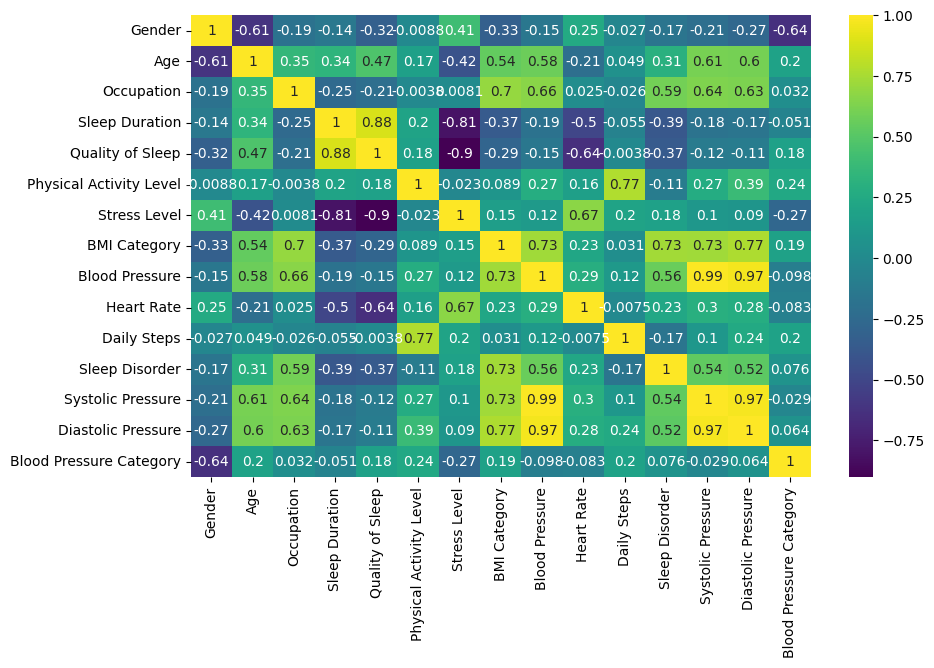

In [ ]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [ ]:
df.describe()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Blood Pressure Category
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,0.512195,42.271003,2.840108,7.144986,7.338753,59.379404,5.368564,0.802168,12.818428,70.062331,6836.314363,0.623306,128.552846,84.647696,0.493225
std,0.500530,8.682957,1.838275,0.791829,1.175677,20.862834,1.775341,0.967626,6.793306,4.054508,1620.028673,0.808648,7.796184,6.200938,0.688084
min,0.000000,27.000000,0.000000,5.900000,4.000000,30.000000,3.000000,0.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000,0.000000
25%,0.000000,36.000000,1.000000,6.500000,6.000000,45.000000,4.000000,0.000000,9.000000,68.000000,6000.000000,0.000000,125.000000,80.000000,0.000000
50%,1.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,15.000000,70.000000,7000.000000,0.000000,130.000000,85.000000,0.000000
75%,1.000000,50.000000,4.000000,7.800000,8.000000,75.000000,7.000000,2.000000,19.000000,72.000000,8000.000000,1.000000,135.000000,90.000000,1.000000
max,1.000000,59.000000,6.000000,8.500000,9.000000,90.000000,8.000000,2.000000,23.000000,86.000000,10000.000000,2.000000,142.000000,95.000000,2.000000


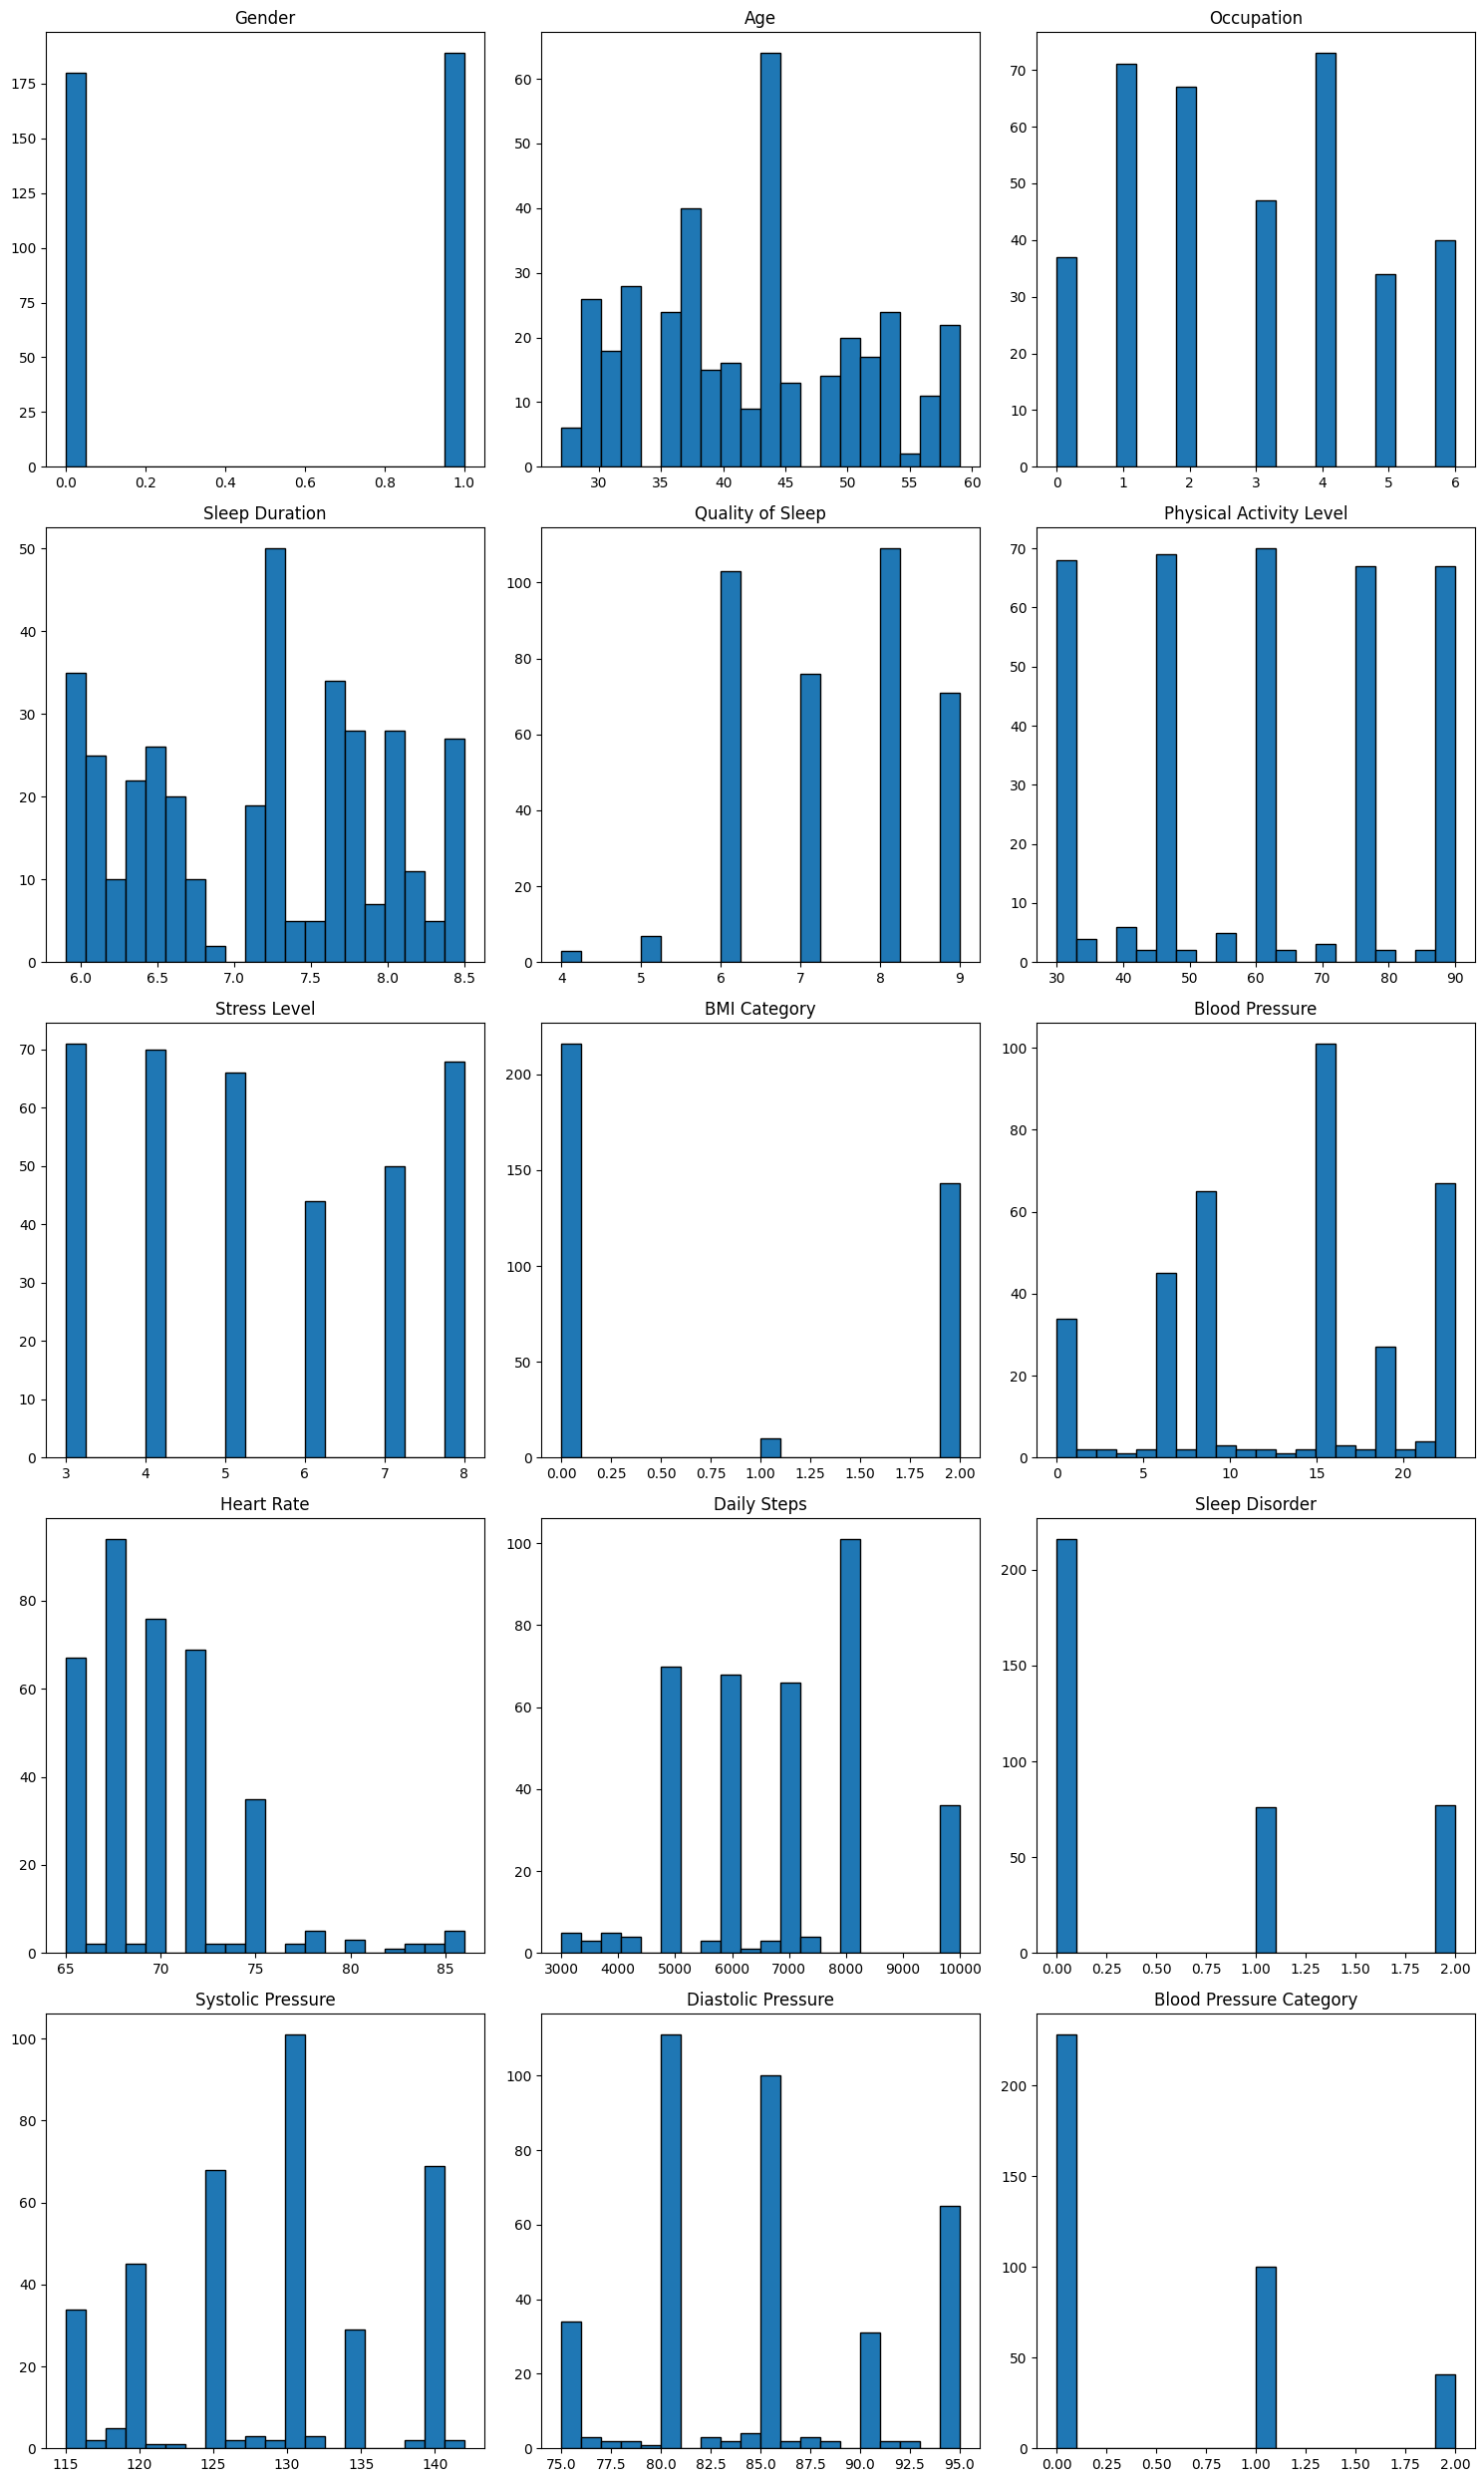

In [ ]:
#Barplots for all the feautures for distribution
num_cols = df.select_dtypes(include=['number']).columns

# Optimized plotting with subplots
num_plots = len(num_cols)
cols_per_row = 3 # Number of plots per row
rows = (num_plots + cols_per_row - 1) // cols_per_row # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5*rows))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(num_cols):
  axes[i].hist(df[col], bins=20, edgecolor='black')
  axes[i].set_title(col)

# Hide any unused subplots
for i in range(num_plots, len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout() # Adjust spacing between subplots
plt.show()

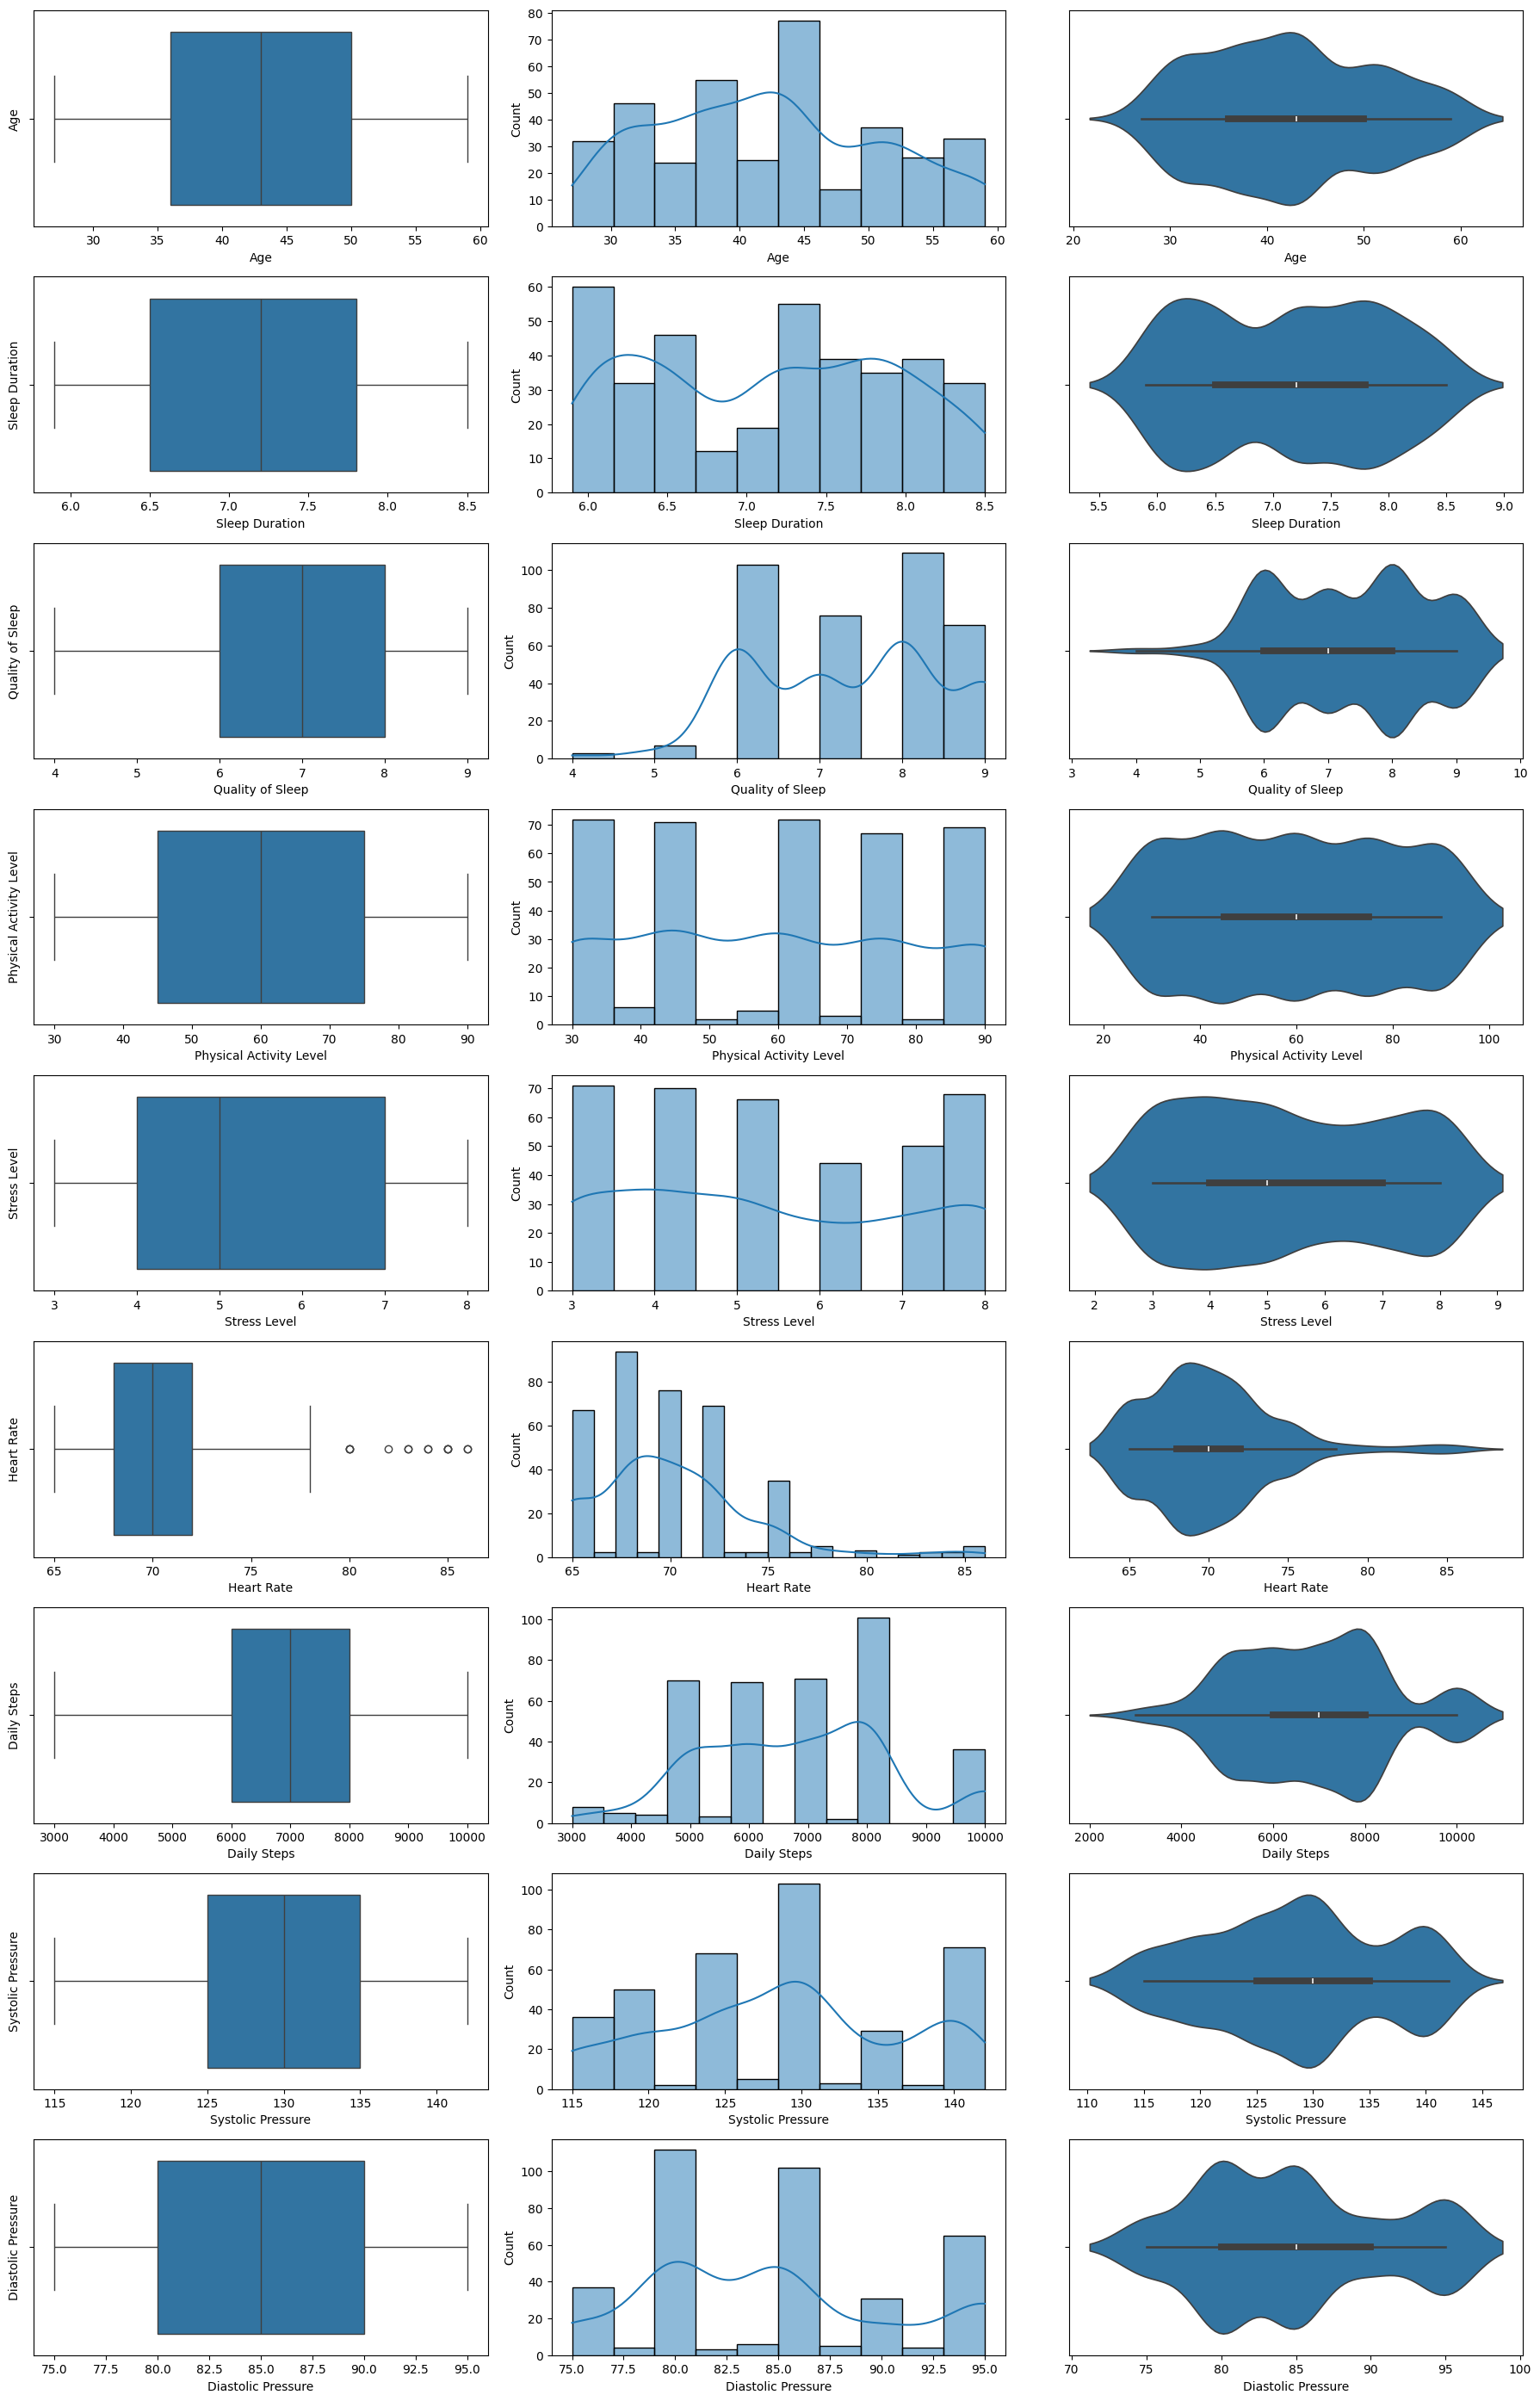

In [ ]:
#Distribution and scewness
numeric_data = pd.DataFrame(df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic Pressure', 'Diastolic Pressure']])

f, axes = plt.subplots(9, 3, figsize=(18, 28))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1], kde = True)
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    axes[count, 0].set_ylabel(f'{var}') # Set label
    count += 1

# Adjust layout and display plot
plt.tight_layout()
plt.show()

Insights into dataset based on visualisation and statistics shown above:

Age ranges from 27 (min) to 59 (max) with median of 43

* Age ranges from 27 (min) to 59 (max) with median of 43
  hence our guideline for categorising blood pressure (aged

*  18 years and older) is a valid guideline
Quality of sleep is left-skewed (negative skew) which means majority of individuals in our data has better quality of sleep
*   Stress level is right skewed (positive skew) as the median is closer to the bottom which means most individuals are not leading a very stressful life

* Heart rate seems to be skewed towards the right end suggesting there are more individuals with lower heart rates. There are also several outliers which are greater than 80 but less than 100. These outliers may be natural extremes as they are within conceivable ranges for humans hence it will be ignored








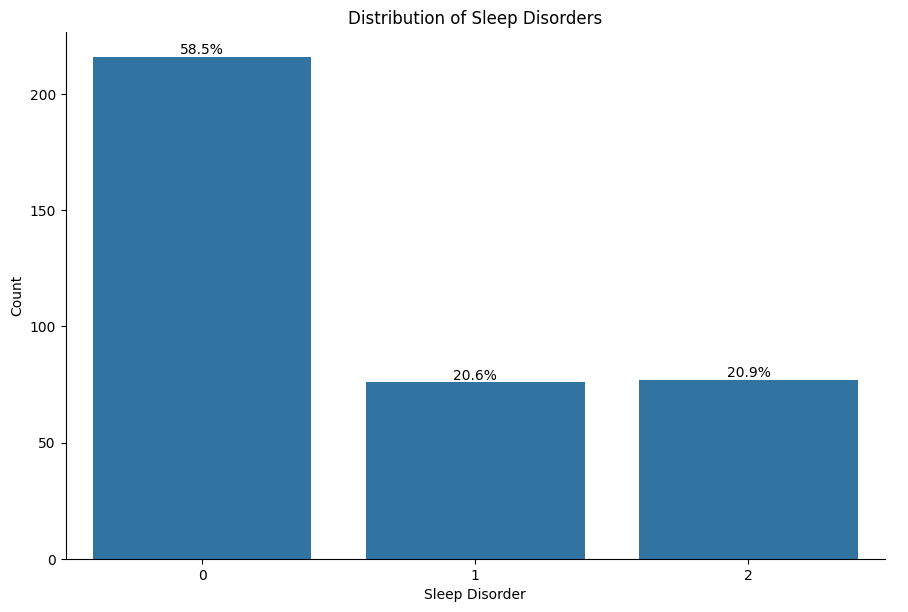

In [ ]:
#Distribution of sleep Disorders
catplot = sb.catplot(x = "Sleep Disorder", data =df, kind = "count", height = 6, aspect = 1.5)

# Access the Axes object
ax = catplot.axes[0][0]

# Calculate percentages for each category
total_count = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center', va = 'bottom')

# Set labels and title
plt.ylabel('Count')
plt.title('Distribution of Sleep Disorders')

# Show the plot
plt.show()

Insight: The ratio of not having a sleep disorder to having one is 58.5% to 41.5% which makes this problem statement worth pursuing as it will help us find out what variables affect the presence of sleep disorders

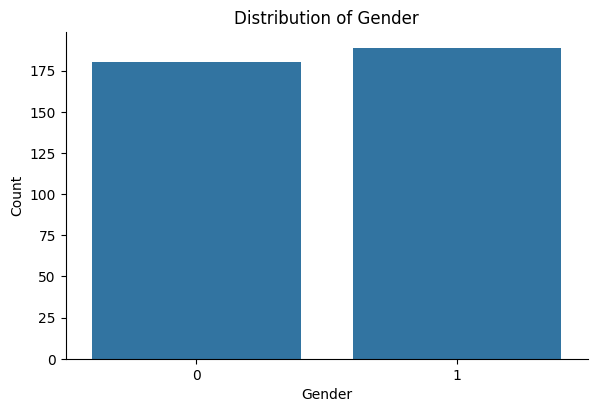

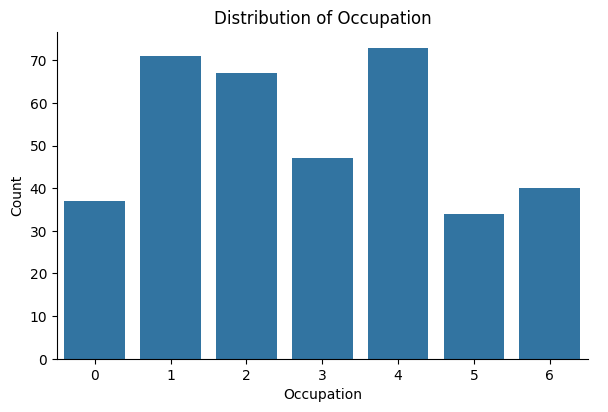

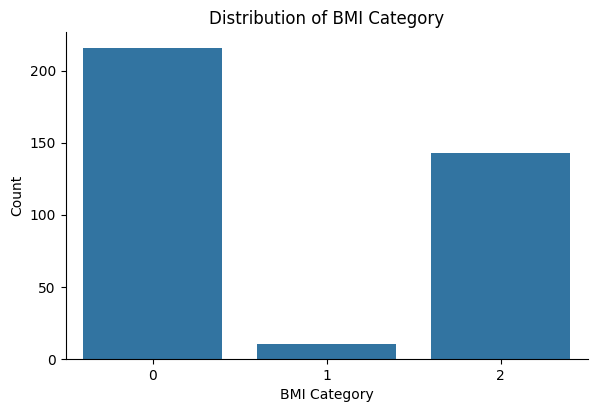

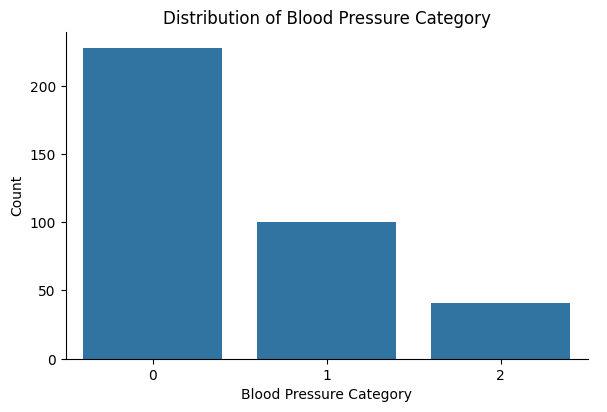

In [ ]:
#Distribution of gender,Occupation,BMI,Blood Pressure Category
categorical_vars = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure Category']

for var in categorical_vars:
    sb.catplot(data = df, x = var, kind = 'count', height = 4, aspect = 1.5)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Distribution of {var}')
    plt.show()

Insights:

Number of female and male is almost equal within this dataset.
Nurses, doctors and engineers form the majority within this dataset.
Majority of individuals have normal BMI which relates with the distribution of 'None' sleep disorder, suggesting a relationship between these two variables. Further analysis is needed.
Majority of individuals have normal to high-normal blood pressure.

<ipython-input-37-e2dfc47e0254>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x = df['Sleep Disorder'], y = df['Age'], palette = 'viridis')


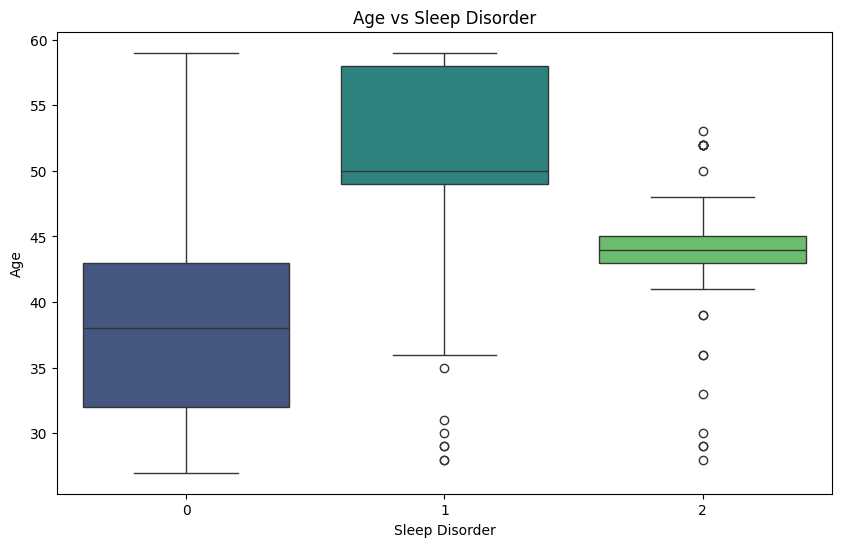

In [ ]:
#Age vs Sleep Disorder
plt.figure(figsize = (10,6))
sb.boxplot(x = df['Sleep Disorder'], y = df['Age'], palette = 'viridis')
plt.title('Age vs Sleep Disorder')
plt.show()

Insights:

Individuals aged 32 to 43, with a focus around 37 years (median age), are less likely to experience sleep apnea or insomnia.
Sleep apnea becomes more prevalent among individuals aged 48 and above, as indicated by the interquartile range (IQR) and a median age of 50 years. Although there are outliers below 35 years, their impact on our prediction should be negligible.
Insomnia is more common in the age range of 43 to 45. Despite the presence of 9 outliers, their influence on our analysis is likely minimal.
The noticeable difference in median range of sleep disorders across age groups suggests that age may play a role in predicting or influencing the prevalence of sleep disorders.

<ipython-input-38-5ec55cb4a553>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x = df['Sleep Disorder'], y = df['Sleep Duration'], palette = 'viridis')


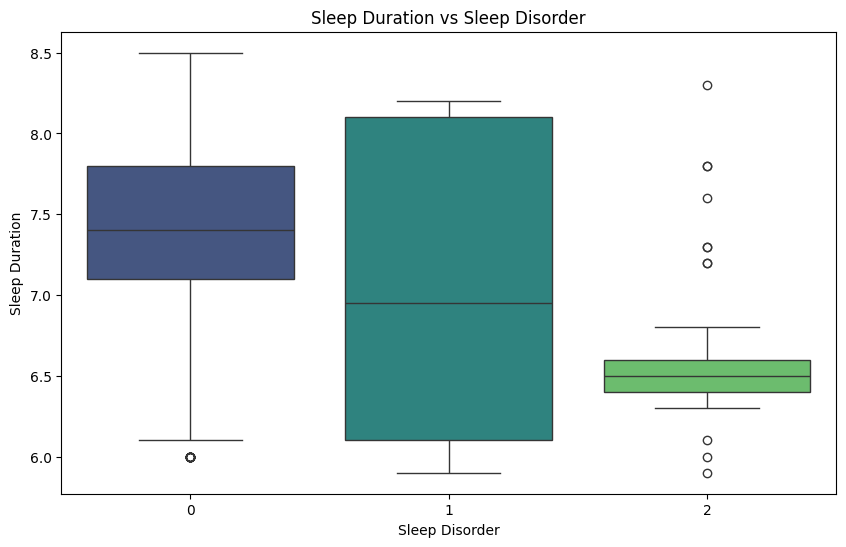

In [ ]:
#Sleep Duration vs Sleep Disorder
plt.figure(figsize = (10,6))
sb.boxplot(x = df['Sleep Disorder'], y = df['Sleep Duration'], palette = 'viridis')
plt.title('Sleep Duration vs Sleep Disorder')
plt.show()

Insights:

Individuals without sleep disorders typically sleep for about 7.1 to 7.8 hours, aligning with the recommended sleep duration for adults.
The range of sleep duration among individuals with sleep apnea is spread out as indicated by the length of the interquartile range (IQR) box. This variability may stem from frequent awakenings during sleep, potentially leading to inaccuracies in calculating total sleep duration.
Individuals with insomnia typically sleep less than 7 hours. Additionally, there are 4 outliers with longer sleep durations which is likely due to fragmented sleep patterns where individuals experience multiple short sleep sessions.
From the median, it is observed that sleep apnea and insomnia are below 7 hours which can indicate a negative correlation. As sleep duration decreases, prevalance of sleep disorder increases. Further analysis will be required to confirm this fact.

<ipython-input-39-d7ac9af46ef7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x = df['Sleep Disorder'], y = df['Quality of Sleep'], palette = 'viridis')


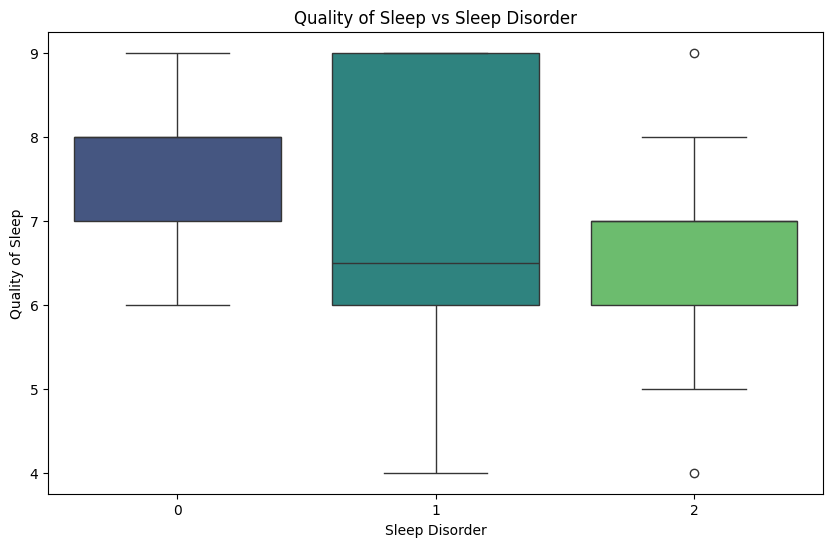

In [ ]:
#Quality of Sleep vs Sleep Disorder
plt.figure(figsize = (10,6))
sb.boxplot(x = df['Sleep Disorder'], y = df['Quality of Sleep'], palette = 'viridis')
plt.title('Quality of Sleep vs Sleep Disorder')
plt.show()

Quality of sleep for individuals with sleep apnea is spread out between 6 to 9 while 'None' ranges from 7 to 8 and insomnia ranges from 6 to 7.
There is no median line in the boxplot for 'None' and 'Insomnia'. It suggests that the median value falls outside the range of the box which can be caused by factors such as skewed data distribution.
Since there is no median line, it is hard to say if this variable will be a good or bad predictor.

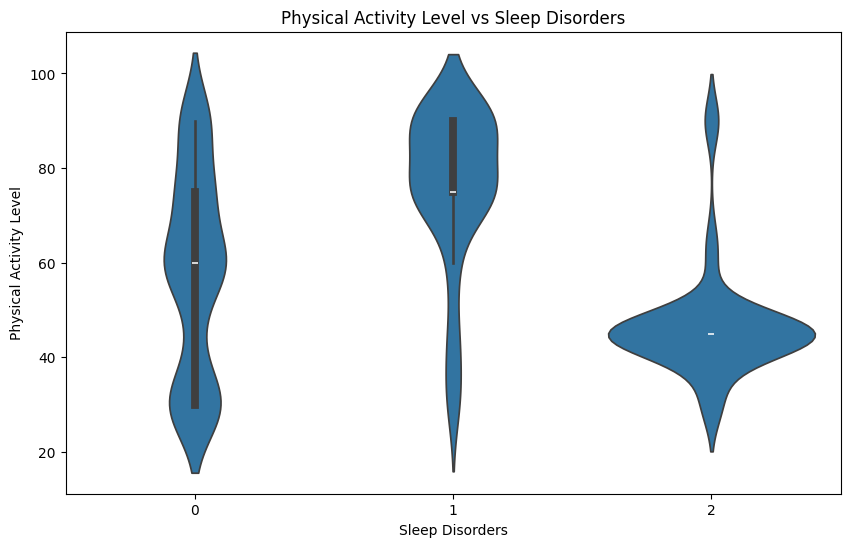

In [ ]:
#Physical Activity Level vs Sleep Disorders
plt.figure(figsize=(10, 6))
sb.violinplot(data=df, x="Sleep Disorder", y="Physical Activity Level")
plt.title("Physical Activity Level vs Sleep Disorders")
plt.xlabel("Sleep Disorders")  # Optional: Customize x-axis label
plt.ylabel("Physical Activity Level")  # Optional: Customize y-axis label
plt.show()

Insights:

Individuals with no sleep disorders have a spread out distribution of physical activity.
The distribution of physical activity for individuals with sleep apnea concentrates at higher values (70 and above).
The distribution of physical activity for individuals with insomnia concentrates at lower values (around 35 to 50). There is no IQR box to be seen. This can occur when data points are evenly distributed across the entire range without clear clustering or outliers. The tail of the violin plot is also thin and long towards the upperside of the plot which suggests that there are a few outliers there.
The absence of IQR box makes it hard to identify whether it will be a good or bad predictor


Text(0.5, 1.0, 'Relationship between Gender and Sleep Disorder')

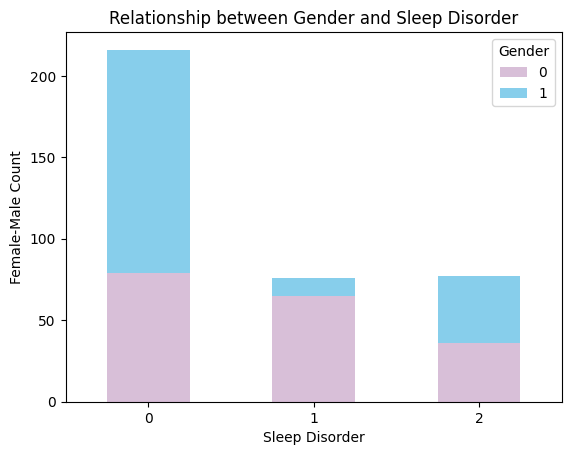

In [ ]:
#Relationship between Gender and Sleep Disorder
# Calculate number of males and females for each sleep disorder or None
gender_counts = df.groupby(['Sleep Disorder', 'Gender']).size().unstack(fill_value=0)

# Stacked bar chart
gender_counts.plot(kind='bar', stacked=True, color=['thistle', 'skyblue'])
# Customise chart
plt.xlabel('Sleep Disorder')
plt.xticks(rotation=360)
plt.ylabel('Female-Male Count')
plt.title('Relationship between Gender and Sleep Disorder')

Insights:

Among normal individuals, male outnumber females
Women outnumber men when it comes to sleep apnea
Men outnumber women when it comes to insomnia
Females tend to suffer from sleep disorder when compared to males.
Based on the insights above, gender shows some correlation with different sleep disorders. However, whether gender alone would be a good predictor for sleep disorders depends on various factors.

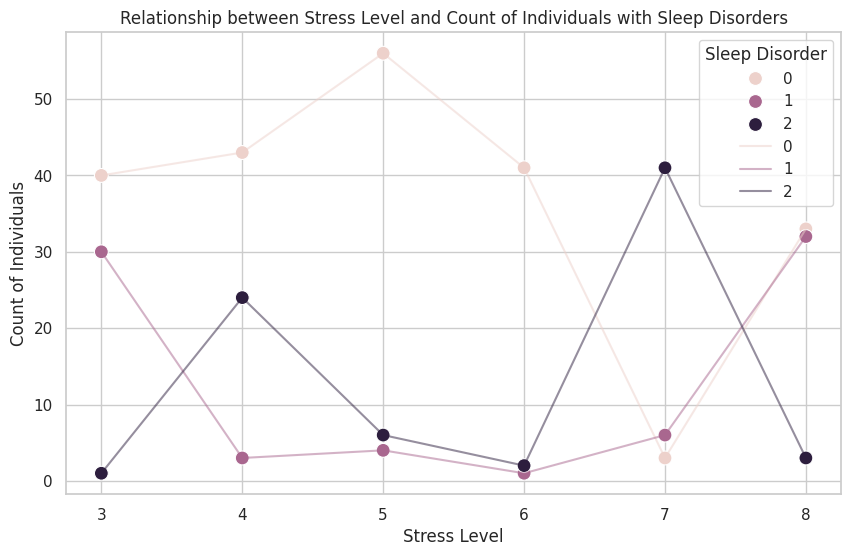

In [ ]:
#Relationship between Stress Level and Count of Individuals with Sleep Disorders
# Calculate the count of individuals for each sleep disorder category and stress level
count_data = df.groupby(['Sleep Disorder', 'Stress Level']).size().reset_index(name='Count')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")

# Create the scatter plot
sb.scatterplot(x='Stress Level', y='Count', hue='Sleep Disorder', data=count_data, s=100)

# Create a line plot to connect the points
sb.lineplot(x='Stress Level', y='Count', hue='Sleep Disorder', data=count_data, alpha=0.5)

plt.title('Relationship between Stress Level and Count of Individuals with Sleep Disorders')
plt.xlabel('Stress Level')
plt.ylabel('Count of Individuals')
plt.legend(title='Sleep Disorder')
plt.show()

Insights:

As stress level increases, the numbers of individuals in the insomnia and sleep apnea groups slightly increases.However, we cannot make a direct cause-and-effect interpretation because at a lower level of stress (Level 3 stress), the number of individuals in the sleep apnea group is in the second position, while at Level 4 stress, insomnia is in the second position and close to the number of individuals in the none group. As the level increases, there is no linear correlation that we can establish hence this variable might not be a good predictor.

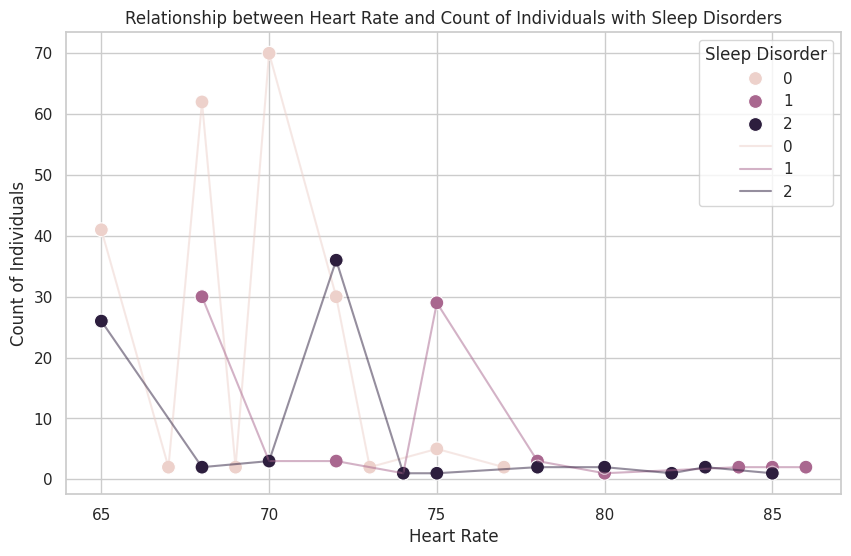

In [ ]:
#Relationship between Heart Rate and Count of Individuals with Sleep Disorders
# Calculate the count of individuals for each sleep disorder category and heart rate
count_data = df.groupby(['Sleep Disorder', 'Heart Rate']).size().reset_index(name='Count')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")

# Create the scatter plot
sb.scatterplot(x='Heart Rate', y='Count', hue='Sleep Disorder', data=count_data, s=100)

# Create a line plot to connect the points
sb.lineplot(x='Heart Rate', y='Count', hue='Sleep Disorder', data=count_data, alpha=0.5)

plt.title('Relationship between Heart Rate and Count of Individuals with Sleep Disorders')
plt.xlabel('Heart Rate')
plt.ylabel('Count of Individuals')
plt.legend(title='Sleep Disorder')
plt.show()


Insights:
 The average sleeping heart rate for a normal healthy adult typically falls between 50-70 bpm, with potentially lower rates for athletes or physically active individuals.
This suggests that individuals with heart rates within this average range are more likely to not have any sleep disorders.
However, individuals with heart rates of 77 bpm and above may show signs of suffering from sleep apnea and insomnia. It's worth noting that the count of such individuals is relatively low, indicating that the correlation between heart rate and sleep disorders may not be significant in this dataset.

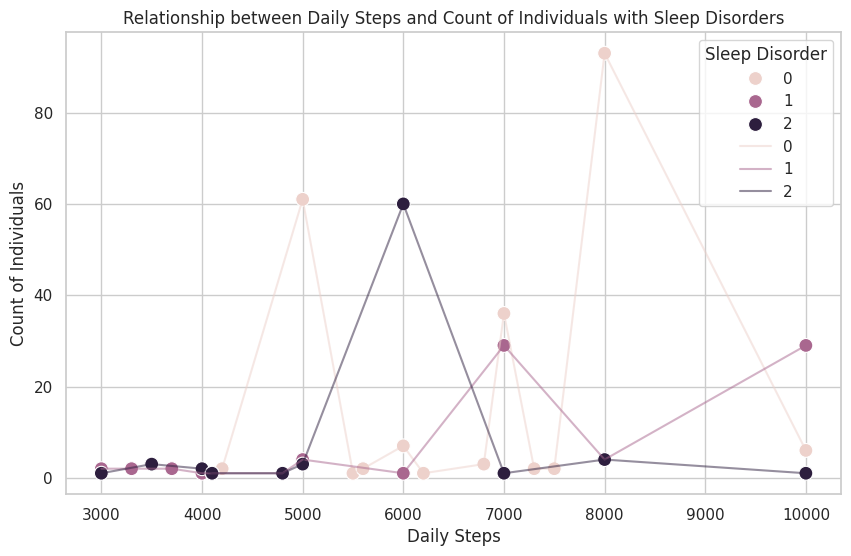

In [ ]:
#Relationship between Daily Steps and Count of Individuals with Sleep Disorders
# Calculate the count of individuals for each sleep disorder category and heart rate
count_data = df.groupby(['Sleep Disorder', 'Daily Steps']).size().reset_index(name='Count')

# Set the figure size and style
plt.figure(figsize=(10, 6))
sb.set(style="whitegrid")

# Create the scatter plot
sb.scatterplot(x='Daily Steps', y='Count', hue='Sleep Disorder', data=count_data, s=100)

# Create a line plot to connect the points
sb.lineplot(x='Daily Steps', y='Count', hue='Sleep Disorder', data=count_data, alpha=0.5)

plt.title('Relationship between Daily Steps and Count of Individuals with Sleep Disorders')
plt.xlabel('Daily Steps')
plt.ylabel('Count of Individuals')
plt.legend(title='Sleep Disorder')
plt.show()


Insights:

There is a positive correlation between the number of daily steps and the absence of sleep disorders, indicating that physical activity during the day may contribute to better sleep health.
However, while individuals with sleep apnea and insomnia generally reported lower daily step counts, there are notable anomalies. For instance, there are 60 individuals with insomnia who took 6000 steps daily and 30 individuals with sleep apnea who took 10000 daily steps.
The anomalies suggest that daily steps alone may not be a definitive predictor of sleep disorders. While higher daily step counts are generally associated with better sleep health, exceptions exist where individuals with sleep disorders engage in significant physical activity.

<ipython-input-45-7c7fd75ae52b>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6')]

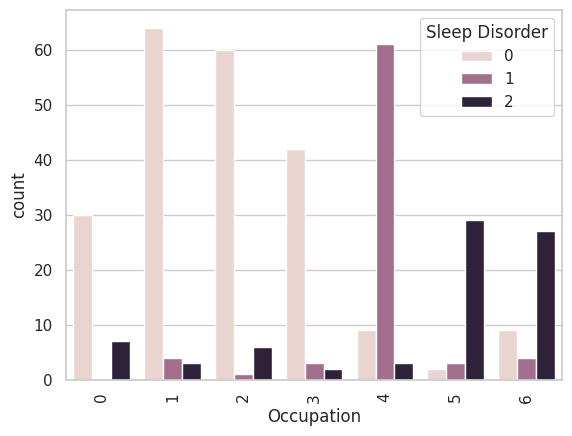

In [ ]:
#Sleep disorder vs Occupation
ax = sns.countplot(x = 'Occupation', data = df, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

From the graph it is clear that the occupation has huge impact on the sleep disorder. Nurses are more subjected to have Sleep Apenea as compared to other occupations and very few of them have no sleep disorder. After nurses, the next most affected occupation is the Salesperson, which counts for the most suffering from Insomia followed by teachers. However there are some occupations where most of the people have very few instance of Sleep Apenea and Insomia such as Engineers, Doctors, Accountants, Lawyers. The Software ENgineers and Managers are so less in number so I cannot say much about that, But the occupation Sales Representative has shown only Sleep Apenea and no Insomia or No sleep disorder.

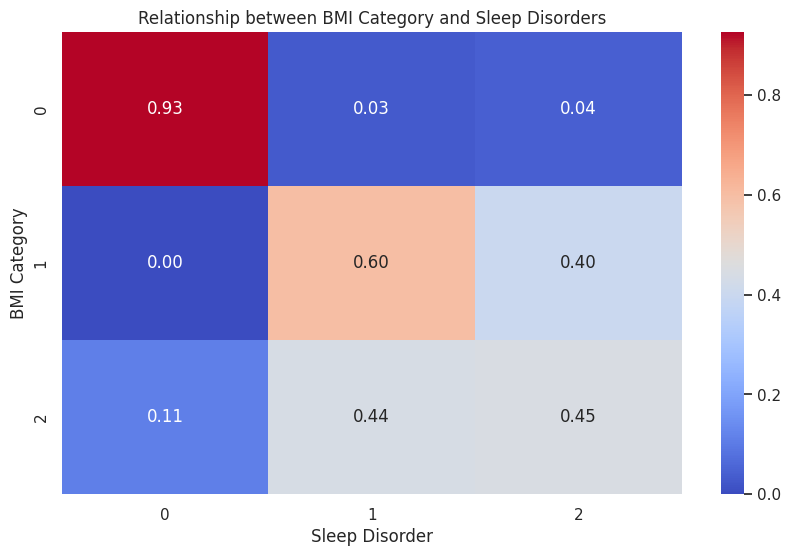

Values of the Heatmap:
[[0.92592593 0.03240741 0.04166667]
 [0.         0.6        0.4       ]
 [0.11188811 0.44055944 0.44755245]]


In [ ]:
#Relationship between BMI Category and Sleep Disorders
# Create cross-tabulation of BMI Category vs Sleep Disorder
crosstab_data = pd.crosstab(df['BMI Category'], df['Sleep Disorder'], normalize='index')

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(crosstab_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Relationship between BMI Category and Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('BMI Category')
plt.show()

print("Values of the Heatmap:")
print(crosstab_data.values)


Insights:

Individuals with Normal BMI are less likely to suffer from sleep disorders
Individuals under the Overweight category have almost a 50% chance to suffer from insomnia or sleep apnea
All obese individuals have either insomnia or sleep apnea
Based on the insights, BMI categories show clear trends and correlations with sleep disorders hence it has high potential to be a good predictor. Normal BMI is associated with lower risk, overweight category with moderate risk, and obese category with high risk of sleep disorders.

### **MODEL SELECTION**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sleep Disorder',axis=1), df['Sleep Disorder'], test_size=0.3, random_state=42)

# **Decision Tree Classifier**

In [ ]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.937984496124031


In [ ]:
d_pred = dtree.predict(X_test)
d_pred

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1])

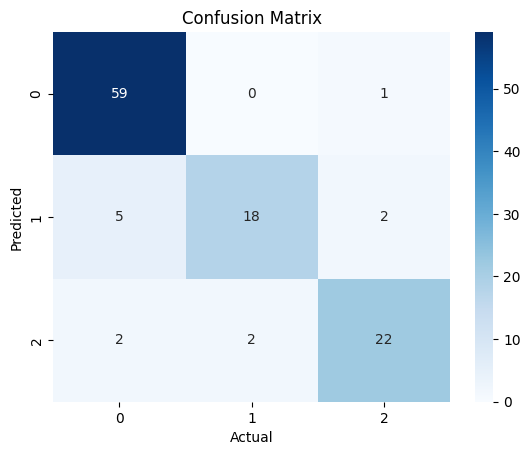

In [ ]:
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<ipython-input-46-2f96cecd1908>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-46-2f96cecd1908>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=

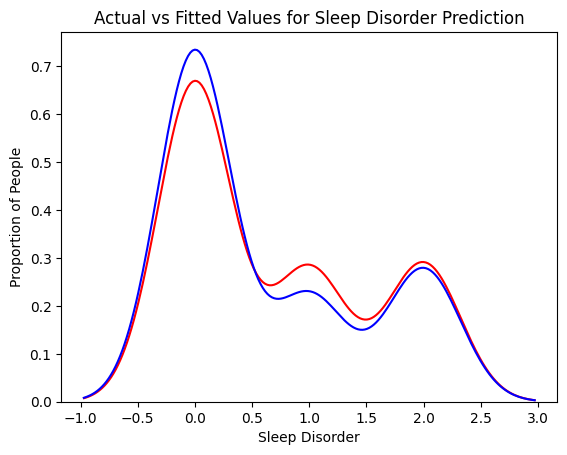

In [ ]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(d_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

In [ ]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.90      0.72      0.80        25
           2       0.88      0.85      0.86        26

    accuracy                           0.89       111
   macro avg       0.89      0.85      0.87       111
weighted avg       0.89      0.89      0.89       111



In [ ]:
#Hyperparameter tuning
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
decision_best_params = grid_search.best_params_
decision_best_score = grid_search.best_score_

print("Best Hyperparameters:",decision_best_params)
print("Best Cross-Validation Score:",decision_best_score)

# Evaluate the best model on the test set
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8837858220211162
Test Accuracy: 0.8918918918918919
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.90      0.72      0.80        25
           2       0.88      0.85      0.86        26

    accuracy                           0.89       111
   macro avg       0.89      0.85      0.87       111
weighted avg       0.89      0.89      0.89       111



# **RANDOMFORESTCLASSIFIER**

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.937984496124031


In [ ]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1,
       0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0,
       1])

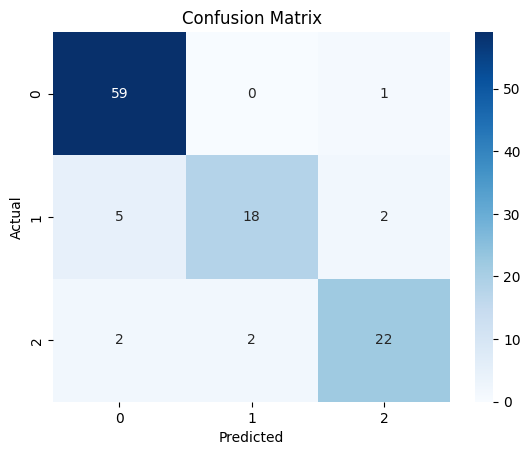

In [ ]:
#confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-54-000292a3142c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-54-000292a3142c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" 

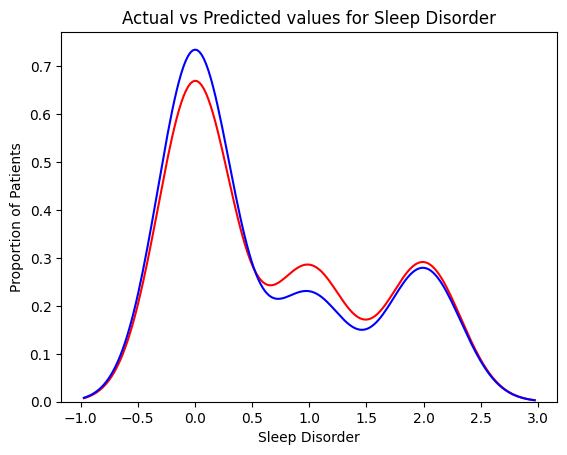

In [ ]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rfc_pred, hist=False, color="b", label="Predicted Values" , ax=ax)
plt.title('Actual vs Predicted values for Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of Patients')
plt.show()

In [ ]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.90      0.72      0.80        25
           2       0.88      0.85      0.86        26

    accuracy                           0.89       111
   macro avg       0.89      0.85      0.87       111
weighted avg       0.89      0.89      0.89       111



In [ ]:
#Hyperparameter tuning
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
random_best_params = grid_search.best_params_
random_best_score = grid_search.best_score_

print("Best Hyperparameters:", random_best_params)
print("Best Cross-Validation Score:",random_best_score)

# Evaluate the best model on the test set
best_rfc = grid_search.best_estimator_
y_pred = best_rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.9108597285067873
Test Accuracy: 0.9099099099099099
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        60
           1       0.95      0.80      0.87        25
           2       0.85      0.85      0.85        26

    accuracy                           0.91       111
   macro avg       0.91      0.88      0.89       111
weighted avg       0.91      0.91      0.91       111



### **Gradient Boosting Classifier**

Training Accuracy: 0.937984496124031
              precision    recall  f1-score   support

           0       0.89      0.98      0.94        60
           1       0.90      0.72      0.80        25
           2       0.88      0.85      0.86        26

    accuracy                           0.89       111
   macro avg       0.89      0.85      0.87       111
weighted avg       0.89      0.89      0.89       111



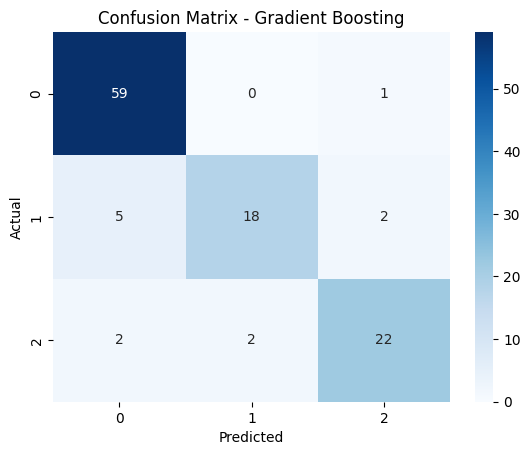

In [ ]:
# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
gb_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Training Accuracy:", gb_classifier.score(X_train, y_train))
print(classification_report(y_test, gb_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-34-ffba2b498420>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-34-ffba2b498420>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gb_pred, hist=False, color="b", label="Fitted Values", ax=

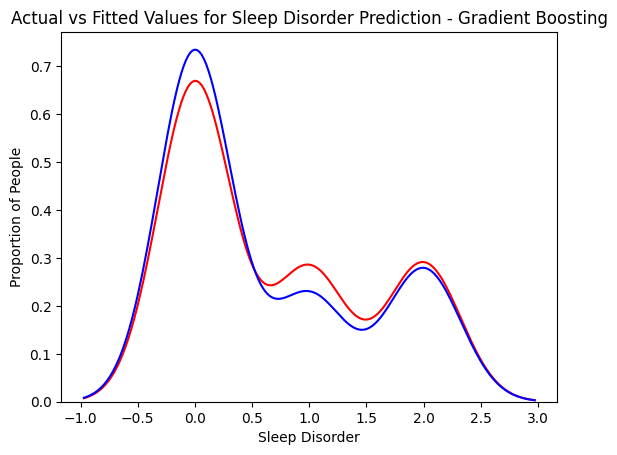

In [ ]:
 #Distribution plot
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(gb_pred, hist=False, color="b", label="Fitted Values", ax=ax)
plt.title('Actual vs Fitted Values for Sleep Disorder Prediction - Gradient Boosting')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

gb_best_params = grid_search.best_params_
gb_best_score = grid_search.best_score_
print("Best Hyperparameters:", gb_best_params)
print("Best Cross-Validation Score:", gb_best_score)

best_gb_classifier = grid_search.best_estimator_
y_pred = best_gb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.899396681749623
Test Accuracy: 0.8918918918918919
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        60
           1       0.95      0.72      0.82        25
           2       0.88      0.85      0.86        26

    accuracy                           0.89       111
   macro avg       0.90      0.85      0.87       111
weighted avg       0.90      0.89      0.89       111



In [ ]:
#COMPARING ALL THE MODEL

print("Decision Tree Classifier:")
print("Best Hyperparameters:", decision_best_params)
print("Best Cross-Validation Score:", decision_best_score)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_pred))


print("\nRandom Forest Classifier:")
print("Best Hyperparameters:", random_best_params)
print("Best Cross-Validation Score:", random_best_score)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_pred))


print("\nGradient Boosting Classifier:")
print("Best Hyperparameters:", gb_best_params)
print("Best Cross-Validation Score:", gb_best_score)
print("Test Accuracy:", test_accuracy)
print(classification_report(y_test, y_pred))

models = {
    'Decision Tree': {'accuracy': test_accuracy, 'params': decision_best_params, 'score': decision_best_score}, # Assuming test_accuracy, decision_best_params, decision_best_score defined
    'Random Forest': {'accuracy': test_accuracy, 'params': random_best_params, 'score': random_best_score}, # Assuming test_accuracy, random_best_params, random_best_score defined
    'Gradient Boosting': {'accuracy': test_accuracy, 'params': gb_best_params, 'score': gb_best_score}  # Assuming test_accuracy, gb_best_params, gb_best_score defined
}


best_model = max(models, key=lambda k: models[k]['accuracy'])


print(f"\nBest Model based on test accuracy: {best_model}")
print(f"Accuracy: {models[best_model]['accuracy']}")
print(f"Best Hyperparameters: {models[best_model]['params']}")



Decision Tree Classifier:
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.8837858220211162
Test Accuracy: 0.9099099099099099
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        60
           1       0.95      0.80      0.87        25
           2       0.85      0.85      0.85        26

    accuracy                           0.91       111
   macro avg       0.91      0.88      0.89       111
weighted avg       0.91      0.91      0.91       111


Random Forest Classifier:
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.9108597285067873
Test Accuracy: 0.9099099099099099
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        60
           1       0.95      0.80      0.87     

# **SUMMARY**

Based on our analysis of the models, we recommend increasing daily exercise and prioritizing sufficient sleep duration.